In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

tf.random.set_seed(14)

In [2]:
# read in the training data
df_train = pd.read_csv("data/labelModel_outputs_Seattle_encoded.csv")

# df_tune = pd.read_csv("data/labelModel_outputs_CurbRamp_Seattle.csv")

# read in the testing file
df_test = pd.read_csv('data/test_set_seattle_encoded.csv')


In [4]:
label_types = df_train['label_type'].unique().tolist()
label_types

['Obstacle',
 'CurbRamp',
 'SurfaceProblem',
 'NoSidewalk',
 'NoCurbRamp',
 'Occlusion',
 'Other',
 'Signal',
 'Crosswalk']

In [6]:
df_test = df_test[df_test['label_type'] == label_types[3]]
df_test.head()

,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,...,clustered,count,false_positive,distance,tag_list,description,tag_count,way_type,intersection_distance,verified
19,96,NoCurbRamp,5.0,prMAsZ283Q-GBpPv9OA2IQ,1,143.0625,-21.0625,168.217239,-1.346527,fa0bbee4-b98d-4eb3-b6da-d9e9aa287f6c,...,1.0,8.0,0,5.150603,0.0,0.0,0.0,0.3,38.290406,1
20,97,NoCurbRamp,5.0,prMAsZ283Q-GBpPv9OA2IQ,1,212.2500,-26.6875,168.217239,-1.346527,fa0bbee4-b98d-4eb3-b6da-d9e9aa287f6c,...,1.0,8.0,0,20.084151,0.0,0.0,0.0,0.3,31.722383,1
21,100,NoCurbRamp,5.0,prMAsZ283Q-GBpPv9OA2IQ,1,300.9375,-29.8750,168.217239,-1.346527,fa0bbee4-b98d-4eb3-b6da-d9e9aa287f6c,...,1.0,9.0,0,19.590366,0.0,0.0,0.0,0.3,32.007204,1
22,101,NoCurbRamp,5.0,prMAsZ283Q-GBpPv9OA2IQ,1,41.0625,-33.4375,168.217239,-1.346527,fa0bbee4-b98d-4eb3-b6da-d9e9aa287f6c,...,0.0,6.0,0,11.451064,0.0,0.0,0.0,0.3,20.791866,1
23,102,NoCurbRamp,5.0,prMAsZ283Q-GBpPv9OA2IQ,1,41.0625,-33.4375,168.217239,-1.346527,fa0bbee4-b98d-4eb3-b6da-d9e9aa287f6c,...,1.0,8.0,0,11.219910,0.0,0.0,0.0,0.3,21.889698,1


In [17]:
# Select node features
feature_cols = ['severity', 'zoom', 'clustered', 'count', 'distance', 'tag_list', 'description', 'tag_count', 'intersection_distance', 
                'busway', 'crossing', 'living_street', 'primary', 'primary_link', 'residential', 'secondary', 'secondary_link', 'tertiary', 'tertiary_link', 'trunk', 'trunk_link', 'unclassified']

num_features = len(feature_cols)

X_weak = df_train[feature_cols] # Features
y_weak = df_train['LM_hard label'] # Target variable

X = df_test[feature_cols]
y = df_test['verified']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_weak)

# Apply the scaler to both the training and test data
X_weak_normalized = scaler.transform(X_weak)
X_normalized = scaler.transform(X)

X_weak = pd.DataFrame(X_weak_normalized, columns=X_weak.columns, index=X_weak.index)
X = pd.DataFrame(X_normalized, columns=X.columns, index=X.index)

X_strong, X_test, y_strong, y_test = train_test_split(X, y, test_size=0.5, random_state=14)

X_weak

,severity,zoom,clustered,count,distance,tag_list,description,tag_count,intersection_distance,busway,...,primary,primary_link,residential,secondary,secondary_link,tertiary,tertiary_link,trunk,trunk_link,unclassified
0,0.4,0.0,0.0,0.411765,0.026823,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.0,1.0,0.352941,0.002776,0.0,0.0,0.0,0.032641,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.2,0.0,0.0,0.352941,0.005379,0.0,0.0,0.0,0.040522,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.2,0.5,0.0,0.117647,0.000526,0.0,0.0,0.0,0.001598,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.5,0.0,0.058824,0.008160,0.0,0.0,0.0,0.009090,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145765,0.2,0.0,1.0,0.588235,0.042435,0.0,0.0,0.0,0.029504,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145766,1.0,1.0,1.0,0.705882,0.015844,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145767,0.2,0.0,0.0,0.529412,0.031792,0.0,0.0,0.0,0.131708,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145768,0.2,0.0,0.0,0.529412,0.044394,0.0,0.0,0.0,0.193564,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Configure the hyperparameters

In [14]:
num_epochs = 50
dropout_rate = 0.2
learning_rate = 1e-4 # learning rate

# fine-tuning
initial_num_epochs = 50
num_epochs_fine_tune = 20
learning_rate_fine_tune = 1e-5 # learning rate for fine-tuning

In [20]:
X_weak.shape[1]

22

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(X_weak.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Specify the loss fuction, optimizer, metrics
model.compile(
    # loss = 'binary_crossentropy',
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics = tf.keras.metrics.Precision()
    # metrics = ['accuracy']
)

# Train the model
history = model.fit(
    X_weak, y_weak, epochs=num_epochs,
    validation_data = (X_test, y_test),
    verbose=2
)


Epoch 1/50
4556/4556 - 4s - loss: 0.3907 - precision_4: 0.8378 - val_loss: 0.5586 - val_precision_4: 0.7909 - 4s/epoch - 980us/step
Epoch 2/50
4556/4556 - 4s - loss: 0.2032 - precision_4: 0.9145 - val_loss: 0.8560 - val_precision_4: 0.8199 - 4s/epoch - 822us/step
Epoch 3/50
4556/4556 - 4s - loss: 0.1659 - precision_4: 0.9429 - val_loss: 1.0707 - val_precision_4: 0.8299 - 4s/epoch - 821us/step
Epoch 4/50
4556/4556 - 4s - loss: 0.1506 - precision_4: 0.9521 - val_loss: 1.2449 - val_precision_4: 0.8307 - 4s/epoch - 826us/step
Epoch 5/50
4556/4556 - 4s - loss: 0.1421 - precision_4: 0.9563 - val_loss: 1.3996 - val_precision_4: 0.8323 - 4s/epoch - 833us/step
Epoch 6/50
4556/4556 - 4s - loss: 0.1375 - precision_4: 0.9584 - val_loss: 1.5256 - val_precision_4: 0.8314 - 4s/epoch - 837us/step
Epoch 7/50
4556/4556 - 4s - loss: 0.1344 - precision_4: 0.9595 - val_loss: 1.6306 - val_precision_4: 0.8312 - 4s/epoch - 825us/step
Epoch 8/50
4556/4556 - 4s - loss: 0.1327 - precision_4: 0.9604 - val_loss: 1

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                552       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                250       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 813
Trainable params: 261
Non-trainable params: 552
_________________________________________________________________


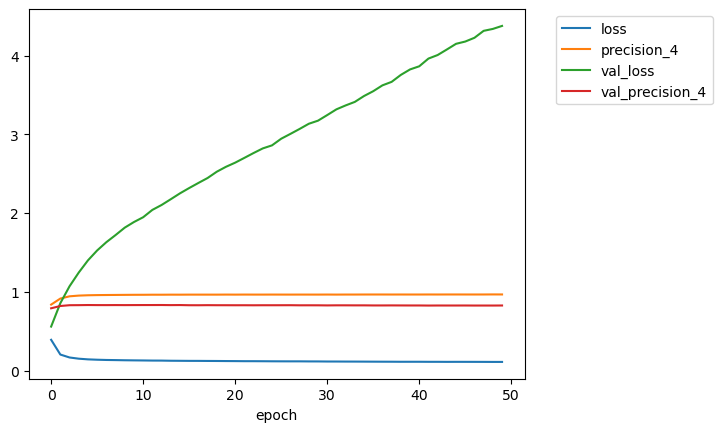

In [28]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Fine-tuning

In [32]:
# Freeze all the layers except the last one
model.layers[0].trainable = False
    
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    # metrics = tf.keras.metrics.Precision()
    metrics = ['Accuracy']
)

history_fine = model.fit(
    X_strong, y_strong,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 1.9730 - Accuracy: 0.7262 - val_loss: 1.9248 - val_Accuracy: 0.7252
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 1.9694 - Accuracy: 0.7265 - val_loss: 1.9118 - val_Accuracy: 0.7255
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 1.9470 - Accuracy: 0.7264 - val_loss: 1.8987 - val_Accuracy: 0.7255
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 1.9551 - Accuracy: 0.7263 - val_loss: 1.8854 - val_Accuracy: 0.7259
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 1.9114 - Accuracy: 0.7259 - val_loss: 1.8725 - val_Accuracy: 0.7267
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 1.9123 - Accuracy: 0.7271 - val_loss: 1.8597 - val_Accuracy: 0.7268
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 1.8960 - Accuracy: 0.7271 - val_loss: 1.8469 - val_Accuracy: 0.7276

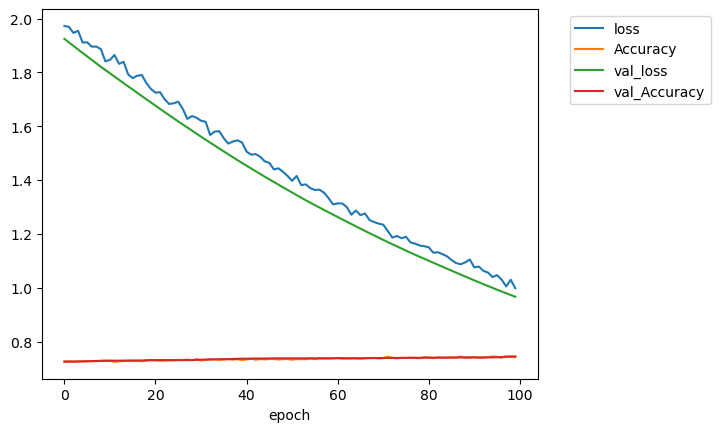

In [33]:
pd.DataFrame(history_fine.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()